<a href="https://colab.research.google.com/github/keskinus/Data-Analysis-/blob/main/World_Happiness_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

World Happiness Report

Data Source:https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv



Some interesting questions we might like to answer are:


* Which are the happiest and least happy countries and regions in the world?

*  Is happiness affected by GDP per capita?

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import io
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 100)


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2019.csv to 2019.csv


In [ ]:

df1 = pd.read_csv(io.BytesIO(uploaded['2019.csv']))
df1


NameError: ignored

In [ ]:
df1.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [ ]:
df1.mean()

Overall rank                    78.500000
Score                            5.407096
GDP per capita                   0.905147
Social support                   1.208814
Healthy life expectancy          0.725244
Freedom to make life choices     0.392571
Generosity                       0.184846
Perceptions of corruption        0.110603
dtype: float64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [ ]:
df1.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
df1.tail()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [ ]:
df1.sample(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
85,86,Kyrgyzstan,5.261,0.551,1.438,0.723,0.508,0.300,0.023
134,135,Swaziland,4.212,0.811,1.149,0.000,0.313,0.074,0.135
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091
30,31,Panama,6.321,1.149,1.442,0.910,0.516,0.109,0.054
10,11,Australia,7.228,1.372,1.548,1.036,0.557,0.332,0.290


In [ ]:
df1.rename(columns={"Overall rank": "Happiness Rank", 
                    "Country or region": "Country",
                    "GDP per capita":"Economy(GDP per capita)",
                    "Freedom to make life choices":"Freedom", 
                    "Perceptions of corruption": "Corruption"},inplace=True)
df1

,Happiness Rank,Country,Score,Economy(GDP per capita),Social support,Healthy life expectancy,Freedom,Generosity,Corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


<BarContainer object of 156 artists>

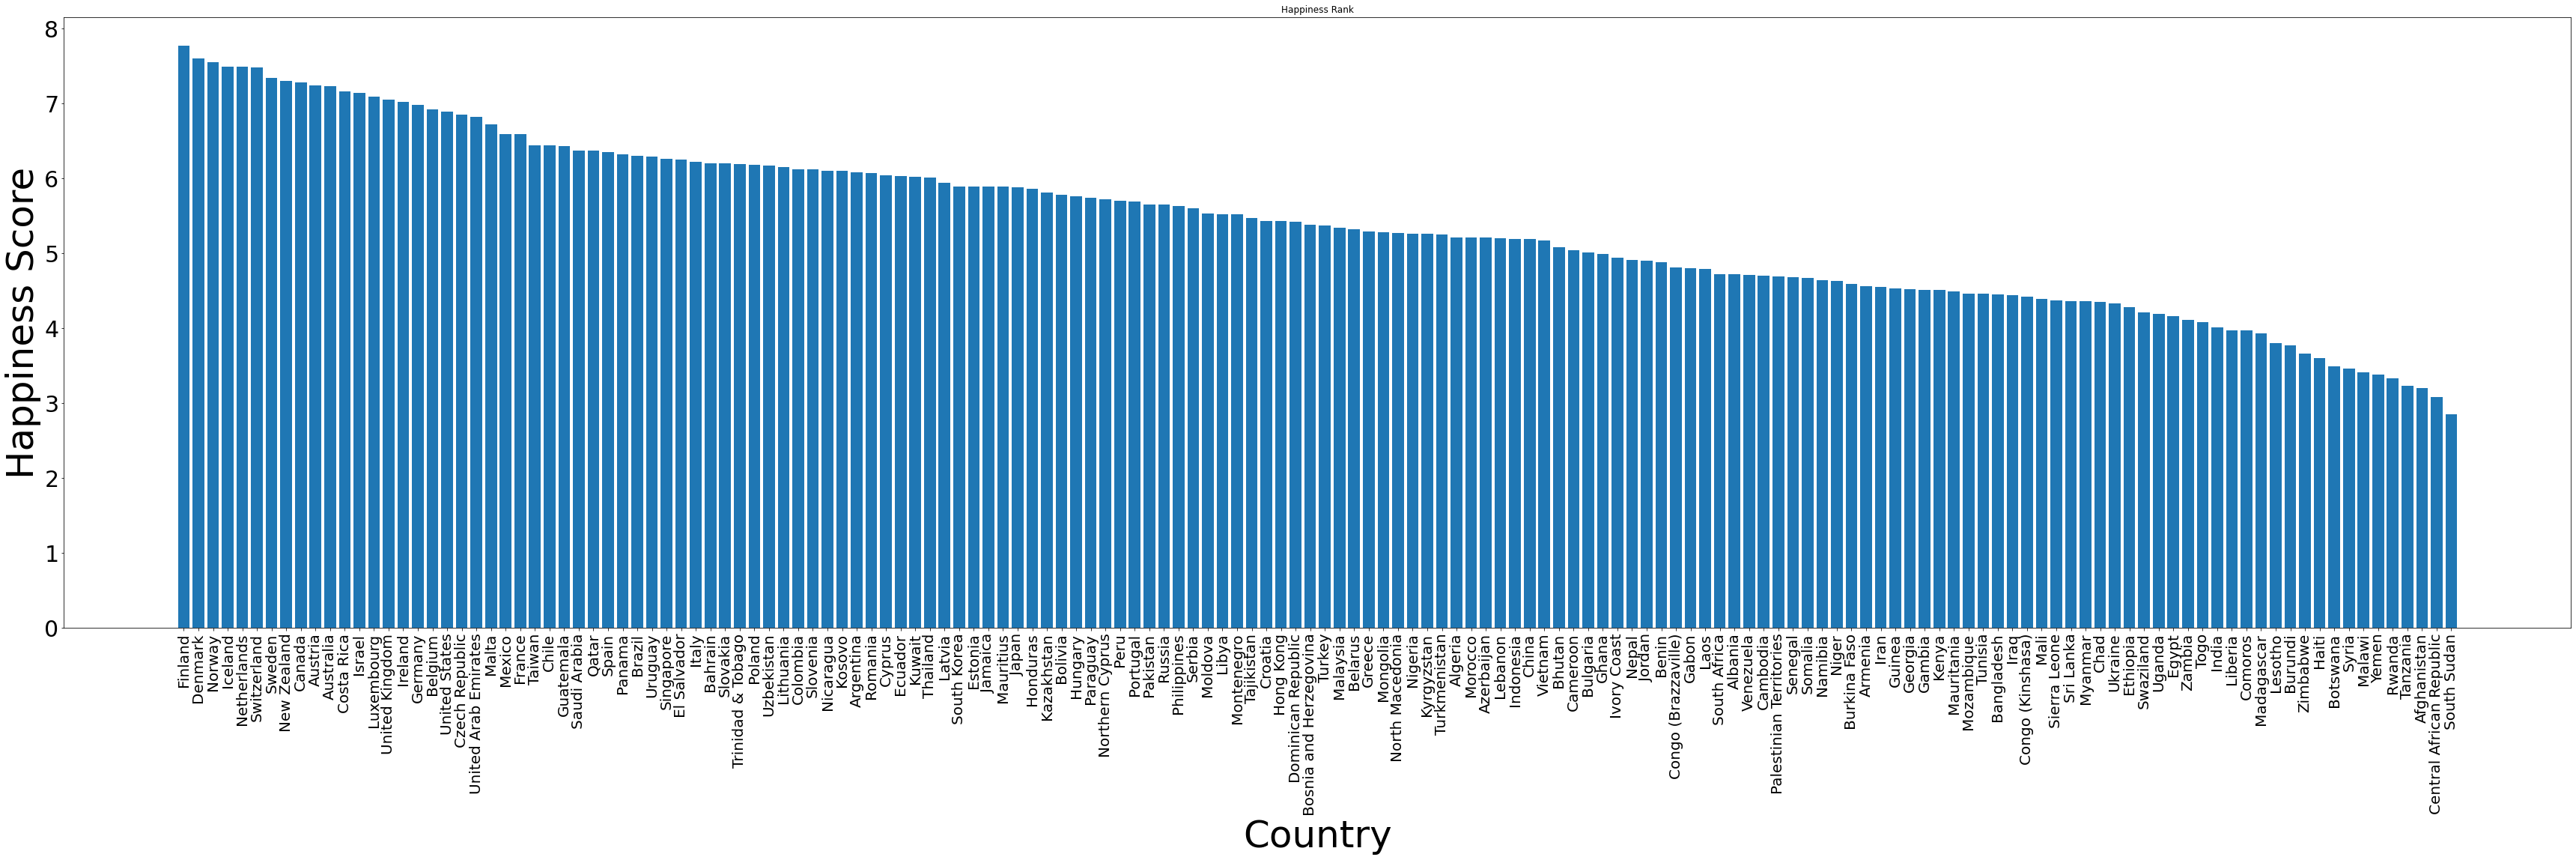

In [ ]:
plt.figure(figsize = (60,15)) 
x = df1["Country"]
y=df1["Score"]
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=30)
plt.xticks(rotation = 90)
plt.xticks(rotation='vertical') 
plt.xlabel('Country',fontsize=50)
plt.ylabel('Happiness Score',fontsize=50)
plt.title('Happiness Rank')
plt.bar(x,y)

Text(0.5, 1.0, 'Happiness Score of the top 15 Countries')

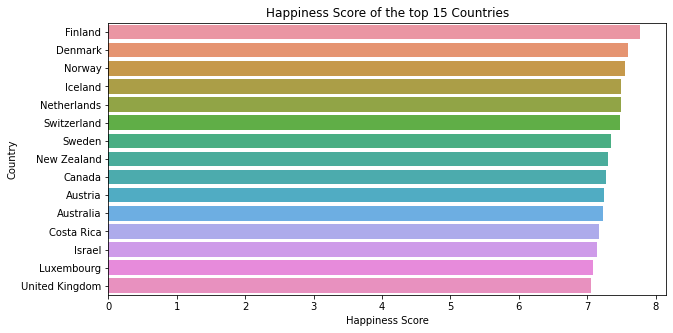

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x = df1['Score'], y=df1['Country'].head(15))
plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 15 Countries')

Text(0.5, 1.0, 'Happiness Score of the least 15 Countries')

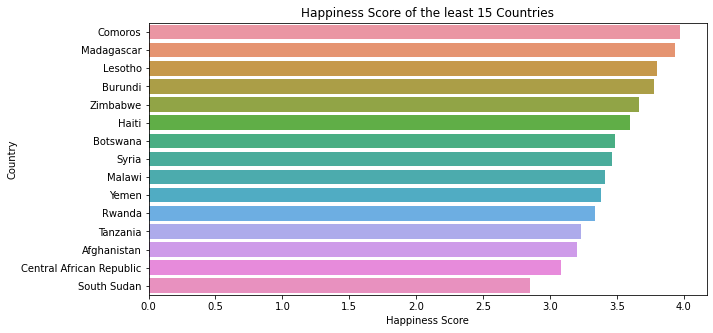

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x = df1['Score'], y=df1['Country'].tail(15))
plt.xlabel("Happiness Score")
plt.title('Happiness Score of the least 15 Countries')

**How Happiness Score is distributed**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram for Happiness Scores')

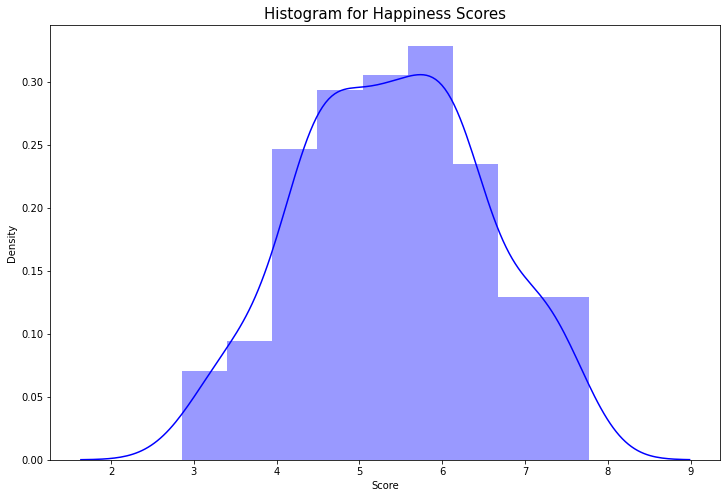

In [ ]:
#Distribution of Happiness Score 
#set the size of the plot and run sns.distplot()

plt.figure(figsize=(12,8))
sns.distplot(df1['Score'], kde = True, color ='blue')
plt.title('Histogram for Happiness Scores', fontsize=15)

**The relationship between different features with Happiness Score**

**Economy-GDP per capita**

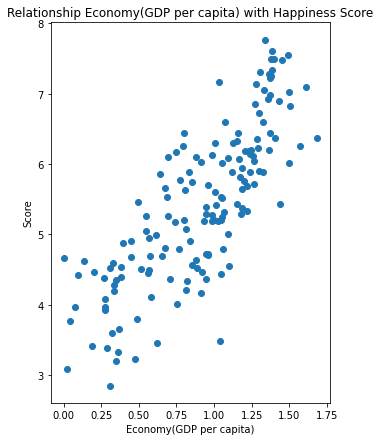

In [ ]:
#The relationship between Economy(GDP per capita) with Happiness Score
plt.figure(figsize = (5, 7)) 
x = df1["Economy(GDP per capita)"]
y= df1["Score"]
plt.xlabel("Economy(GDP per capita)")
plt.ylabel("Score")
plt.title("Relationship Economy(GDP per capita) with Happiness Score")
plt.scatter(x,y)

Text(0.5, 0, 'Economy(GDP per capita)')

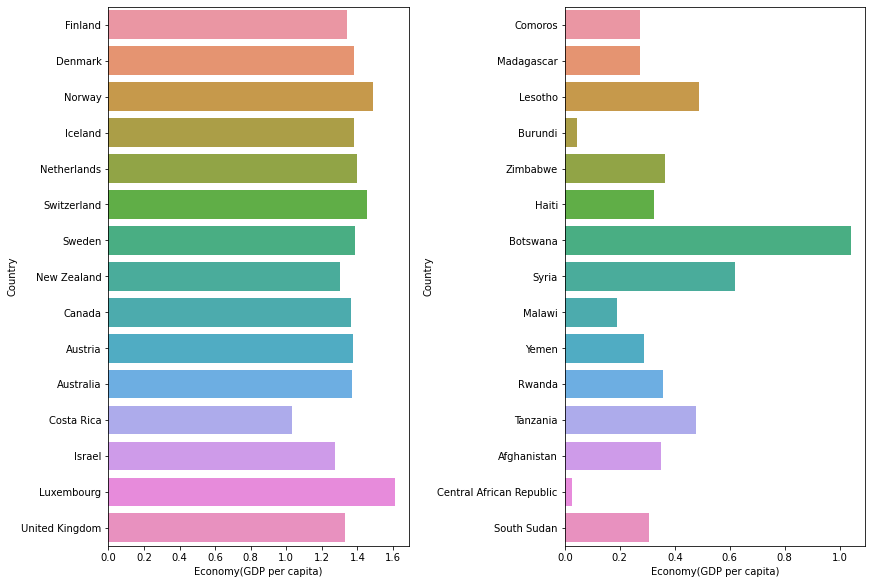

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2,constrained_layout=True, figsize=(12,8))
#plt.figure(figsize=(10,10))
sns.barplot(x = df1['Economy(GDP per capita)'], y=df1['Country'].head(15), ax=axes[0])
plt.xlabel("Economy(GDP per capita)")


#plt.figure(figsize=(10,10))
sns.barplot(x = df1['Economy(GDP per capita)'], y=df1['Country'].tail(15), ax=axes[1])
plt.xlabel("Economy(GDP per capita)")


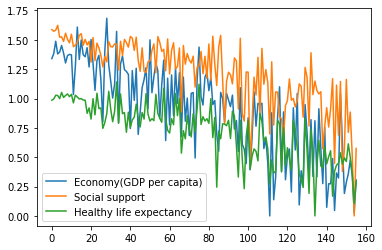

In [ ]:
plt.plot = df1.loc[:,["Economy(GDP per capita)", "Social support","Healthy life expectancy" ]]
plt.plot.plot()

**Social Support**

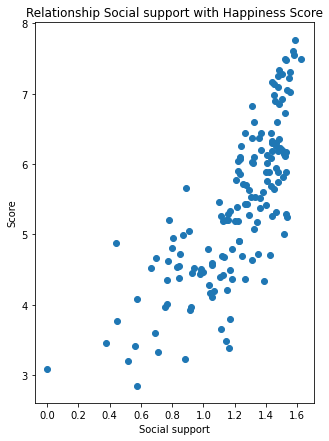

In [ ]:

#The relationship between Social support with Happiness Score
plt.figure(figsize = (5, 7)) 
x = df1["Social support"]
y= df1["Score"]
plt.xlabel("Social support")
plt.ylabel("Score")
plt.title("Relationship Social support vs Happiness Score")
plt.scatter(x,y)

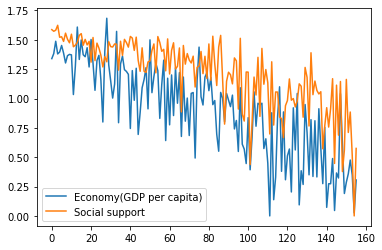

In [ ]:
plt.plot = df1.loc[:,["Economy(GDP per capita)", "Social support" ]]
plt.plot.plot()

**Healthy life expectancy**

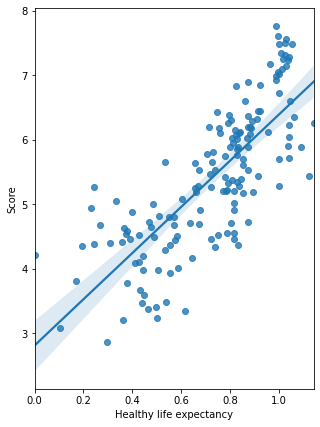

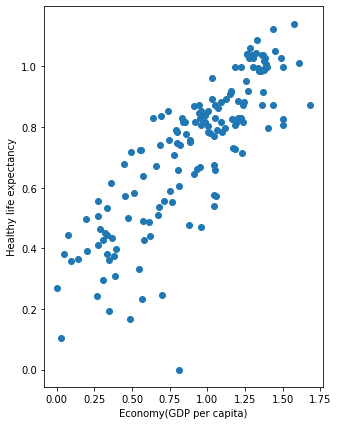

In [ ]:

plt.figure(figsize = (5, 7)) 
sns.regplot(x=df1["Healthy life expectancy"], y=df1['Score'])
plt.figure(figsize = (5, 7)) 
x = df1["Economy(GDP per capita)"]
y= df1["Healthy life expectancy"]
plt.xlabel("Economy(GDP per capita)")
plt.ylabel("Healthy life expectancy")
plt.scatter(x,y)



**Freedom to make life choices**

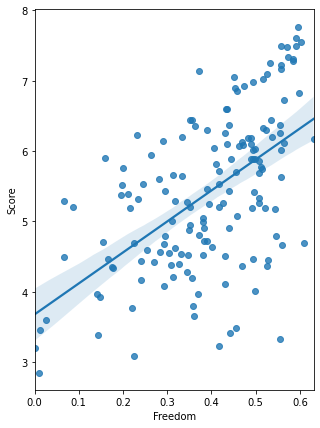

In [ ]:
plt.figure(figsize = (5, 7)) 
sns.regplot(x=df1['Freedom'], y=df1['Score'])


 **Generosity**

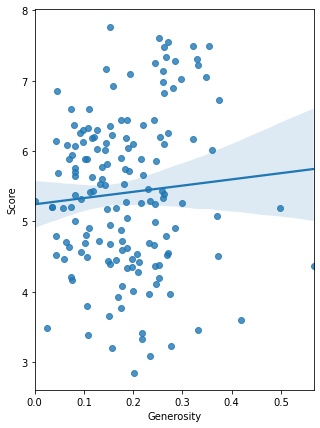

In [ ]:
plt.figure(figsize = (5, 7)) 
sns.regplot(x=df1['Generosity'], y=df1['Score'])
plt.title('Histogram for Corruption', fontsize=15)

**Perceptions of corruption**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram for Corruption')

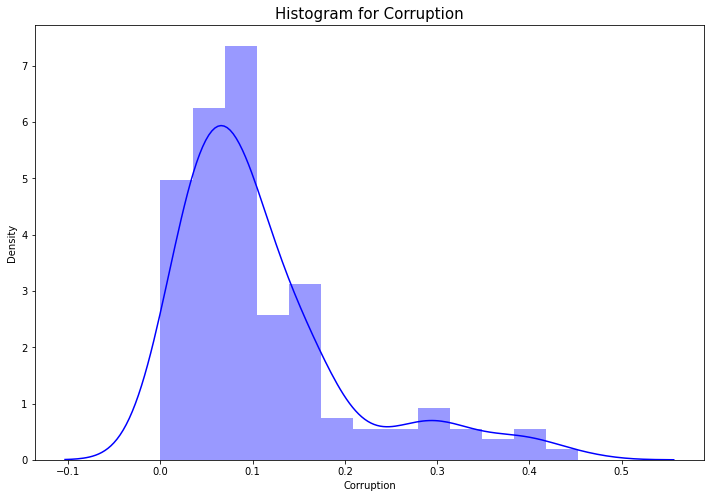

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(df1['Corruption'], kde = True, color ='blue')
plt.title('Histogram for Corruption', fontsize=15)

Text(0.5, 1.0, 'Happiness Score vs Corruption')

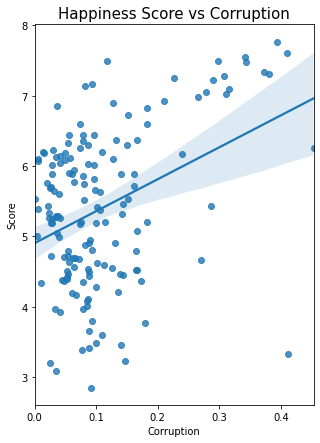

In [ ]:
plt.figure(figsize = (5, 7)) 
sns.regplot(x=df1['Corruption'], y=df1['Score'])
plt.title('Happiness Score vs Corruption', fontsize=15)

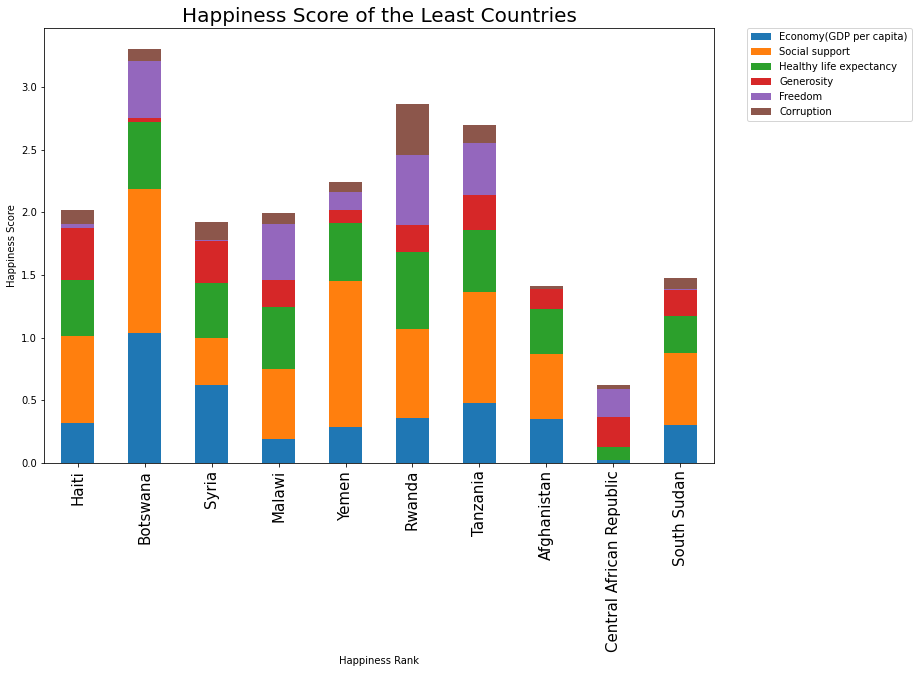

In [ ]:

ax = df1.tail(10).plot(y=['Economy(GDP per capita)','Social support','Healthy life expectancy', 'Generosity', 'Freedom','Corruption'], x="Country",kind="bar", stacked=True, figsize =(12,8))
plt.title("Happiness Score of the Least Countries",fontsize=20 )
plt.xticks(fontsize=15)
plt.ylabel("Happiness Score")
plt.xlabel("Happiness Rank")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

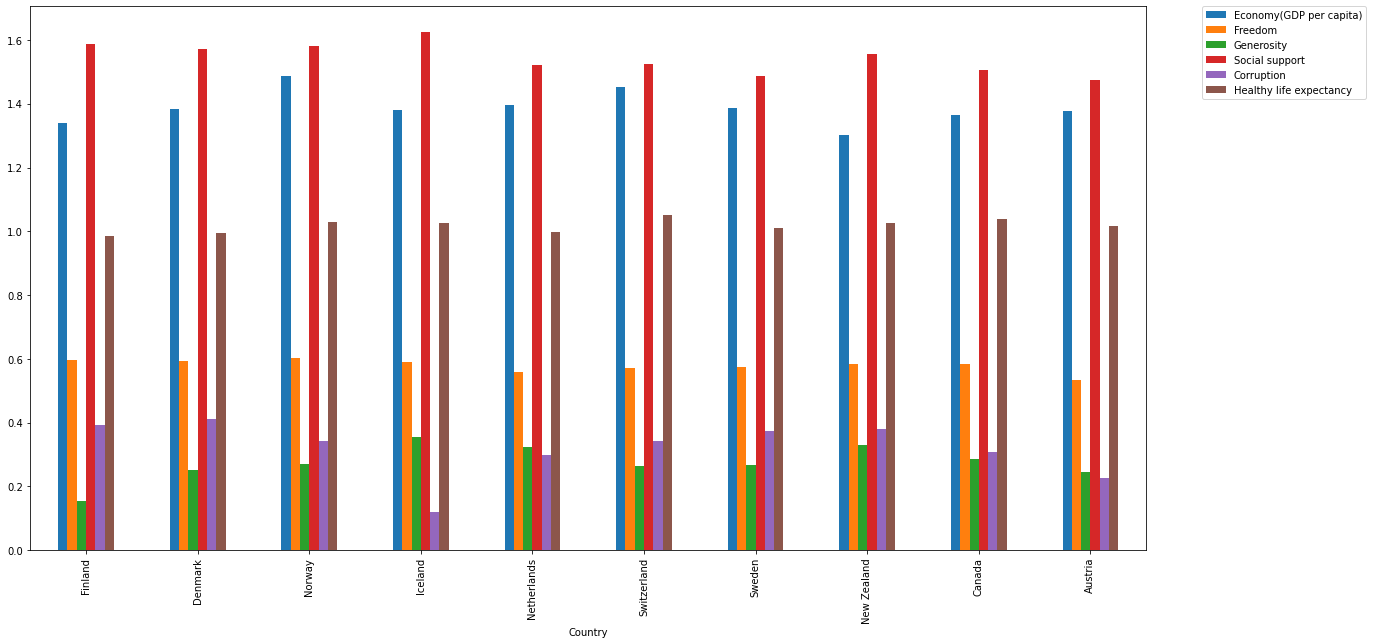

In [ ]:

df2=df1[:10]
df2.plot('Country',['Economy(GDP per capita)','Freedom','Generosity','Social support','Corruption', 'Healthy life expectancy'],kind ='bar', figsize=(20,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

 **Countries with better positioned in each of the aspects being analyzed.**

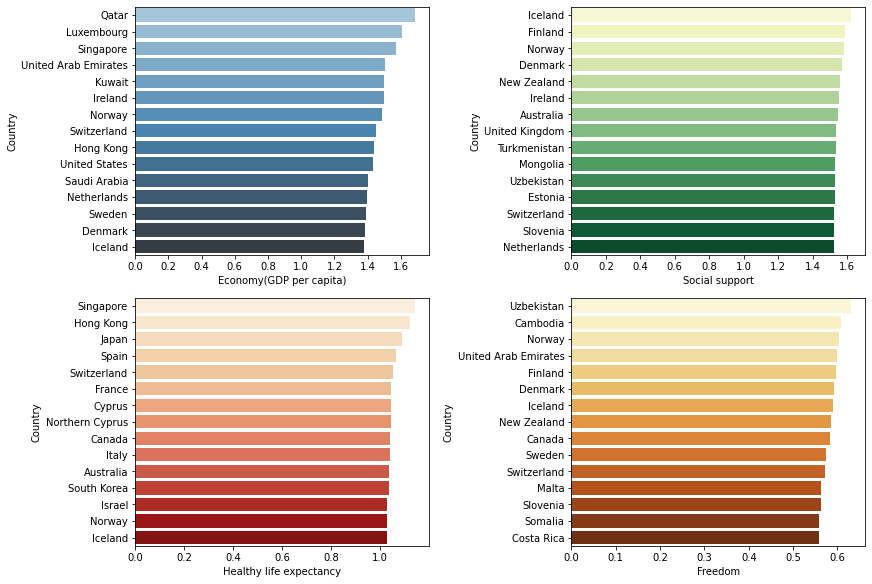

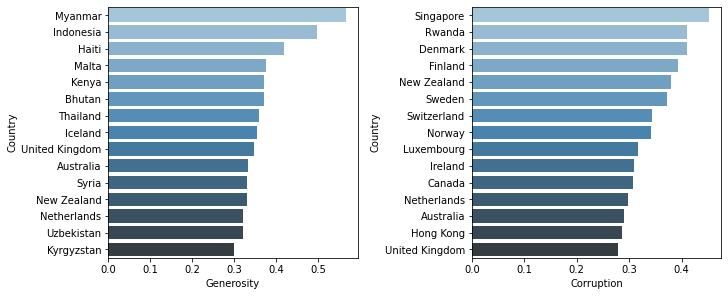

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))
sns.barplot(x="Economy(GDP per capita)",y="Country",data=df1.nlargest(15,'Economy(GDP per capita)'),ax=axes[0,0],palette="Blues_d")
sns.barplot(x='Social support', y='Country',data=df1.nlargest(15,'Social support'),ax=axes[0,1],palette="YlGn")
sns.barplot(x='Healthy life expectancy', y='Country',data=df1.nlargest(15,'Healthy life expectancy'),ax=axes[1,0],palette='OrRd')
sns.barplot(x='Freedom', y='Country',data=df1.nlargest(15,'Freedom'),ax=axes[1,1],palette='YlOrBr')
fig, axes = plt.subplots(nrows=1, ncols=2,constrained_layout=True,figsize=(10,4))
sns.barplot(x='Generosity' ,y='Country', data=df1.nlargest(15,'Generosity'),ax=axes[0],palette='Blues_d')
sns.barplot(x='Corruption' ,y='Country',data=df1.nlargest(15,'Corruption'),ax=axes[1],palette='Blues_d')

In [ ]:
#Global Happiness Map

import plotly.graph_objs as go
from plotly.offline import iplot

data = dict(type = 'choropleth', 
           locations = df1['Country'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = df1['Score'], 
           text = df1['Country'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

**Conculusion**


* The  happiest people live in te wealthier countries.
* The economy plays a vital role in people’s life.
* A high focus on GDP and strongly correlated features such as social support and healthy life expectancy.
* These factors then weigh more when determining overall happiness.


